In [4]:
#read numpy arrays and convert them into X and y of machine learning
import numpy as np
import pandas as pd
import os
import sys




X=np.load('Xmol2vec.npy')
y=np.load('ymol2vec.npy')

#normalization
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X = scaler.fit_transform(X)



#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

print(X_train.shape)

(397, 300)


In [5]:
print(X[0])

[ 1.67110220e-01 -2.05820322e+00 -4.71039248e+00 -2.89131856e+00
  6.50057602e+00 -6.29690075e+00 -1.49995871e+01 -4.90180492e+00
  1.47420168e+01  1.59416485e+00  6.27516806e-01  5.90372705e+00
  3.62904930e+00  5.18021774e+00 -1.29874916e+01 -6.29498601e-01
  1.19649725e+01 -1.83549347e+01 -1.29549265e+01  1.24220295e+01
  3.99702764e+00  1.25278931e+01  2.24470196e+01  6.99144173e+00
 -4.35944605e+00  6.23554325e+00 -1.12722168e+01 -1.19258223e+01
  4.51000500e+00 -9.77745724e+00  5.33896971e+00 -7.13298893e+00
 -1.11209545e+01  3.56816739e-01 -1.41137636e+00  4.37806034e+00
 -1.92036343e+00  1.95603371e+00  7.47544003e+00  1.01122713e+01
  2.17269087e+00  9.52645111e+00 -4.85903692e+00 -6.79598475e+00
 -2.96072364e+00  7.00032854e+00  5.70706606e+00  2.29232426e+01
 -1.00890436e+01  1.72249973e+00  2.50891066e+00 -1.17815409e+01
  2.93588567e+00 -1.08822412e+01 -1.42535353e+01 -2.25757961e+01
 -9.03721619e+00  8.92336178e+00  3.70611024e+00  5.24022818e+00
  3.09952664e+00 -5.06963

In [82]:
#apply SMOTE to balance the train set
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42)
# X_train, y_train = sm.fit_resample(X_train, y_train)

# print(X_train.shape)

#random oversampling to balance the train set
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=42)
# X_train, y_train = ros.fit_resample(X_train, y_train)

# print(X_train.shape)


(536, 300)


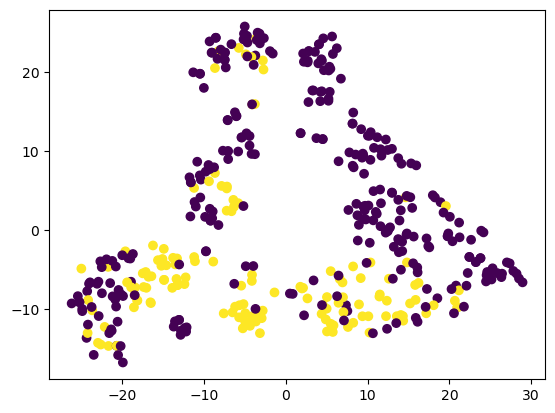

In [4]:
#tsne visualization
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X_embedded = TSNE(n_components=2).fit_transform(X)

plt.scatter(X_embedded[:,0],X_embedded[:,1],c=y)

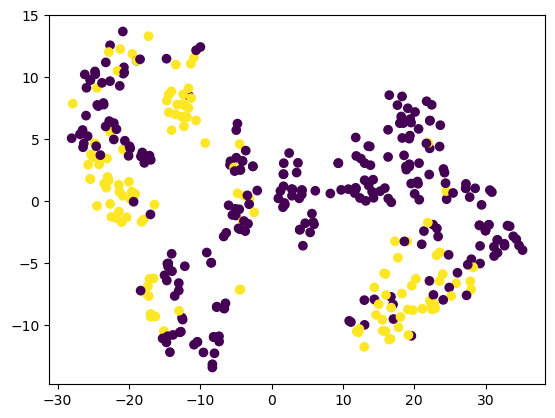

In [5]:

X_embedded = TSNE(n_components=2).fit_transform(X_train)

plt.scatter(X_embedded[:,0],X_embedded[:,1],c=y_train)

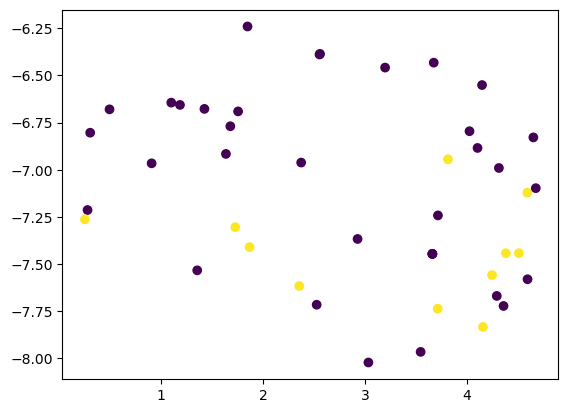

In [6]:

X_embedded = TSNE(n_components=2).fit_transform(X_test)

plt.scatter(X_embedded[:,0],X_embedded[:,1],c=y_test)

In [86]:
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA()

# Fit PCA to the data
pca.fit(X)

# Determine the number of components to explain at least 98% of the variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.90) + 1

print("Number of components explaining 98% of variance:", n_components)

# Transform the data using the determined number of components
X_pca = pca.transform(X)[:,:n_components]

print(X_pca)


Number of components explaining 98% of variance: 3
[[ -2.557117    1.9719361  -5.2198997]
 [ -9.261974    3.1249475  -1.1864421]
 [-13.628087    1.446762   -2.0441506]
 ...
 [-10.603624    2.738882   -1.547069 ]
 [-12.09934     2.1789958  -2.3700054]
 [-12.923218    1.8974023  -3.260937 ]]


In [87]:
print(X_pca.shape)

(442, 3)


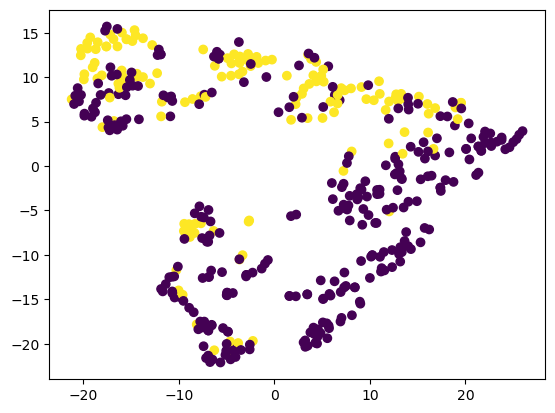

In [88]:
#tsne
X_embedded = TSNE(n_components=2).fit_transform(X_pca)

plt.scatter(X_embedded[:,0],X_embedded[:,1],c=y)


In [6]:
#apply models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Instantiate the models
lr = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

# Train the models
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predict the labels
y_pred_lr = lr.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluate the models
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr)) 
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_lr))
print("MCC:", matthews_corrcoef(y_test, y_pred_lr))
print("\n")

print("SVM")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_svm))
print("MCC:", matthews_corrcoef(y_test, y_pred_svm))
print("\n")

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))
print("MCC:", matthews_corrcoef(y_test, y_pred_rf))
print("\n")




/home/pavit21178/anaconda3/envs/new_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Accuracy: 0.9111111111111111
Precision: 0.7777777777777778
Recall: 0.7777777777777778
F1 Score: 0.7777777777777778
ROC AUC Score: 0.861111111111111
MCC: 0.7222222222222222


SVM
Accuracy: 0.8444444444444444
Precision: 1.0
Recall: 0.2222222222222222
F1 Score: 0.3636363636363636
ROC AUC Score: 0.6111111111111112
MCC: 0.4313310928137537


Random Forest
Accuracy: 0.9555555555555556
Precision: 1.0
Recall: 0.7777777777777778
F1 Score: 0.8750000000000001
ROC AUC Score: 0.8888888888888888
MCC: 0.8583950752789521




In [8]:
from sklearn.model_selection import GridSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
encodings_train=X_train
encodings_test=X_test

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_dist, cv=3, n_jobs=-1, verbose=0)
grid_search.fit(encodings_train, y_train)
print(f'Hyperparameter Tuning Results\n')
print(f'Best Parameters: {grid_search.best_params_}\n')
print(f'Best Score: {grid_search.best_score_}\n')
y_pred = grid_search.best_estimator_.predict(encodings_test)

print(f'F1 Score: {f1_score(y_test, y_pred)}\n')
print(f'Precision Score: {precision_score(y_test, y_pred)}\n')
print(f'Mathews Correlation Coefficient: {matthews_corrcoef(y_test, y_pred)}\n')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}\n')
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}\n')

/home/pavit21178/anaconda3/envs/new_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2970 fits failed out of a total of 8910.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1315 fits failed with the following error:
Traceback (most recent call last):
  File "/home/pavit21178/anaconda3/envs/new_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pavit21178/anaconda3/envs/new_env/lib/python3.9/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/pavit21178/anaconda3/envs/new_env/lib/python3.9/site-packages/sklearn/base.py", line 637, i

Hyperparameter Tuning Results

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 400}

Best Score: 0.8388395230500495

F1 Score: 0.761904761904762

Precision Score: 0.8

Mathews Correlation Coefficient: 0.6909874910284776

Accuracy Score: 0.8888888888888888

ROC AUC Score: 0.8342245989304813



In [99]:
#test the pca data
# Instantiate the models
lr = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=0)

x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the models
lr.fit(x_train_pca, y_train_pca)
svm.fit(x_train_pca, y_train_pca)
rf.fit(x_train_pca, y_train_pca)

# Predict the labels
y_pred_lr = lr.predict(x_test_pca)
y_pred_svm = svm.predict(x_test_pca)
y_pred_rf = rf.predict(x_test_pca)

# Evaluate the models
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test_pca, y_pred_lr))
print("Precision:", precision_score(y_test_pca, y_pred_lr))
print("Recall:", recall_score(y_test_pca, y_pred_lr))
print("F1 Score:", f1_score(y_test_pca, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test_pca, y_pred_lr))
print("MCC:", matthews_corrcoef(y_test_pca, y_pred_lr))
print("\n")

print("SVM")
print("Accuracy:", accuracy_score(y_test_pca, y_pred_svm))
print("Precision:", precision_score(y_test_pca, y_pred_svm))
print("Recall:", recall_score(y_test_pca, y_pred_svm))
print("F1 Score:", f1_score(y_test_pca, y_pred_svm))
print("ROC AUC Score:", roc_auc_score(y_test_pca, y_pred_svm))
print("MCC:", matthews_corrcoef(y_test_pca, y_pred_svm))
print("\n")

print("Random Forest")
print("Accuracy:", accuracy_score(y_test_pca, y_pred_rf))
print("Precision:", precision_score(y_test_pca, y_pred_rf))
print("Recall:", recall_score(y_test_pca, y_pred_rf))
print("F1 Score:", f1_score(y_test_pca, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test_pca, y_pred_rf))
print("MCC:", matthews_corrcoef(y_test_pca, y_pred_rf))
print("\n")




Logistic Regression
Accuracy: 0.7415730337078652
Precision: 0.5806451612903226
Recall: 0.6428571428571429
F1 Score: 0.6101694915254238
ROC AUC Score: 0.7148711943793911
MCC: 0.41884880724539886


SVM
Accuracy: 0.6292134831460674
Precision: 0.35294117647058826
Recall: 0.21428571428571427
F1 Score: 0.26666666666666666
ROC AUC Score: 0.5169789227166276
MCC: 0.04011375812351054


Random Forest
Accuracy: 0.7640449438202247
Precision: 0.6296296296296297
Recall: 0.6071428571428571
F1 Score: 0.6181818181818182
ROC AUC Score: 0.7216042154566745
MCC: 0.4476867278946049


